# It all starts with Pandas
### reference- http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
### http://chrisalbon.com/python/pandas_join_merge_dataframe.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_columns',50)
%matplotlib inline

# Series
A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

In [7]:
# create a Series with an arbitrary list
s=pd.Series([12,"Harvey",10,"Mike"],index=['A','B','C','D'])
print s

A        12
B    Harvey
C        10
D      Mike
dtype: object


In [24]:
# convert a dictionary to series
x={'Delhi':100, 'Haryana':200,'Punjab':300,'Chennai':400}
states=pd.Series(x)
states

Chennai    400
Delhi      100
Haryana    200
Punjab     300
dtype: int64

In [11]:
# find an item in a series
print('Delhi' in states)
print ('Mumbai' in states)

True
False


In [25]:
# union of 2 series
states=states[['Delhi','Haryana','Punjab']]+states[['Chennai','Delhi']]
states
# adds where the index matches only

Chennai      NaN
Delhi      200.0
Haryana      NaN
Punjab       NaN
dtype: float64

In [26]:
# returns a boolean series indicating which values aren't NULL
states.notnull()

Chennai    False
Delhi       True
Haryana    False
Punjab     False
dtype: bool

In [27]:
# use boolean logic to grab the NULL cities
print(states.isnull())
print('\n')
print(states[states.isnull()])

Chennai     True
Delhi      False
Haryana     True
Punjab      True
dtype: bool


Chennai   NaN
Haryana   NaN
Punjab    NaN
dtype: float64


# DataFrame
A DataFrame is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can also think of a DataFrame as a group of Series objects that share an index (the column names).

In [28]:
data={'id':[1,2,3,4,5],
     'item':['tshirts','shirts','pants','socks','flipflops'],
     'sales':[1234,4321,9876,6789,10989]}
df=pd.DataFrame(data,columns=['id','sales','item'])
df

,id,sales,item
0,1,1234,tshirts
1,2,4321,shirts
2,3,9876,pants
3,4,6789,socks
4,5,10989,flipflops


# Concat & Joins/Merge

In [29]:
# create a data frame
data_a = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(data_a, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [30]:
# create a second Data Frame
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [31]:
# create a third data frame
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


### Join the two dataframes along rows

In [38]:
df_new_rowise=pd.concat([df_a,df_b],axis=0)
df_new_rowise

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


### Join the two dataframes along Columns

In [37]:
df_new_colwise=pd.concat([df_a,df_b],axis=1)
df_new_colwise

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


### Merge two dataframes along the subject_id value

In [41]:
df_new=pd.merge(df_new_rowise,df_n, on='subject_id')
df_new

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


### Merge with outer join

In [45]:
pd.merge(df_a,df_b, on='subject_id',how="outer")

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


### Merge with outer join

In [46]:
pd.merge(df_a,df_b, on='subject_id',how="inner")

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


### Merge with Right join

In [48]:
pd.merge(df_a,df_b, on='subject_id',how="right")

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan


### Merge with left join

In [49]:
pd.merge(df_a,df_b, on='subject_id',how="left")

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


### Merge while adding a suffix to duplicate column names

In [53]:
pd.merge(df_a, df_b, on='subject_id', how='left', suffixes=('_left', '_right'))

,subject_id,first_name_left,last_name_left,first_name_right,last_name_right
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


### Merge based on indexes

In [54]:
pd.merge(df_a, df_b, right_index=True, left_index=True)

,subject_id_x,first_name_x,last_name_x,subject_id_y,first_name_y,last_name_y
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


### Aggregate

In [88]:
data={'id':[1,2,3,4,5,6,7,8,9,10],
     'user':['x','y','x','z','z','y','x','z','z','q'],
     'movies':['a','b','c','a','b','a','a','b','c','b'],
     'expenditure':[12,23,45,65,12,33,44,50,335,667]}
df=pd.DataFrame(data,columns=['id','user','movies','expenditure'])
df

,id,user,movies,expenditure
0,1,x,a,12
1,2,y,b,23
2,3,x,c,45
3,4,z,a,65
4,5,z,b,12
5,6,y,a,33
6,7,x,a,44
7,8,z,b,50
8,9,z,c,335
9,10,q,b,667


### count of movies watched per user

In [94]:
df.groupby('movies').count()

,id,user,expenditure
movies,,,
a,4,4,4
b,4,4,4
c,2,2,2


### total amount spent on movies by each user

In [90]:
df.groupby('user').sum()

,id,expenditure
user,,
q,10,667
x,11,101
y,8,56
z,26,462


In [91]:
df.groupby(['user','movies']).sum()

id  expenditure
user movies                 
q    b       10          667
x    a        8           56
     c        3           45
y    a        6           33
     b        2           23
z    a        4           65
     b       13           62
     c        9          335

### Pivot Table

In [113]:
pd.pivot_table(df,values=['expenditure'], index=['movies'],columns=['user'],aggfunc=[np.mean,sum],fill_value=0)

mean                      sum             
       expenditure              expenditure             
user             q   x   y    z           q   x   y    z
movies                                                  
a                0  28  33   65           0  56  33   65
b              667   0  23   31         667   0  23   62
c                0  45   0  335           0  45   0  335

In [115]:
### Alternative code
pd.pivot_table(df,values=['expenditure','id'], index=['movies','user'],aggfunc={"id":len,"expenditure":[np.sum,np.mean]})

expenditure       id
                   mean  sum len
movies user                     
a      x             28   56   2
       y             33   33   1
       z             65   65   1
b      q            667  667   1
       y             23   23   1
       z             31   62   2
c      x             45   45   1
       z            335  335   1

### Cross Tab

In [95]:
pd.crosstab(df.movies,df.user)

user,q,x,y,z
movies,,,,
a,0,2,1,1
b,1,0,1,2
c,0,1,0,1


### Cross tab with % age

In [130]:
def percConvert(ser):
    return (ser/float(ser[-1]))*100

pd.crosstab(df.movies,df.user,margins=True).apply(percConvert, axis=1)

user,q,x,y,z,All
movies,,,,,
a,0.0,50.0,25.0,25.0,100.0
b,25.0,0.0,25.0,50.0,100.0
c,0.0,50.0,0.0,50.0,100.0
All,10.0,30.0,20.0,40.0,100.0


### Apply Function

#### Column wise Missing Values.

In [120]:
df_new.apply(lambda x:sum(x.isnull()),axis=0)

subject_id      0
first_name_x    3
last_name_x     3
first_name_y    3
last_name_y     3
dtype: int64

#### Row wise Missing Values.

In [122]:
df_new.apply(lambda x:sum(x.isnull()),axis=1)

0    2
1    2
2    2
3    0
4    0
5    2
6    2
7    2
dtype: int64

### Sorting Data frames

In [133]:
df.sort_values(['movies','user'],ascending=True)

,id,user,movies,expenditure
0,1,x,a,12
6,7,x,a,44
5,6,y,a,33
3,4,z,a,65
9,10,q,b,667
1,2,y,b,23
4,5,z,b,12
7,8,z,b,50
2,3,x,c,45
8,9,z,c,335


## Box Plots

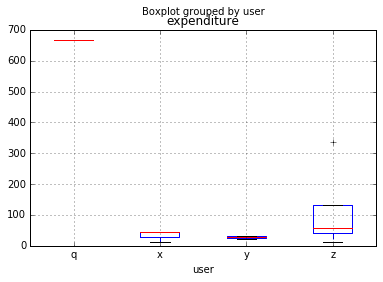

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot(column="expenditure",by="user")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B6D9588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C12B4E0>]], dtype=object)

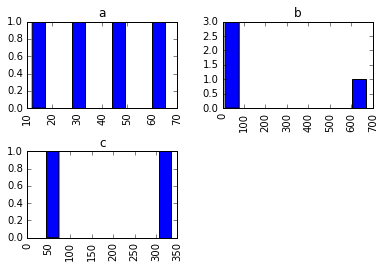

In [141]:
df.hist(column='expenditure',by='movies',bins=10)